# Multiple Logistic Regression - Math, Intuition & Implementation from Scratch in Python
This notebook follows a [YouTube video]() walkthrough. The below sections cover the Python implementation of both Logistic Regression and Multiple Logistic Regression from scratch.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Logistic Regression

### Initialize X, y, w, b
First we will initialize a sample dataset given X input features and y output labels. Then we will initialize a weight and bias value.


In [2]:
X = np.array([0,1,2,3,4,6])
y = np.array([0,0,1,0,1,1])
w = 2
b = -3

### Predict y given X, w, b
Now test our model parameters by inputting X into a predict_y function.


In [3]:
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

In [4]:
def predict_y(X, w, b):
    m = y.shape[0]
    y_probs = np.zeros(m)
    for i in range(m):
        y_probs[i] = sigmoid(w * X[i] + b)
    y_preds = np.where(y_probs >= 0.5, 1, 0)
    return y_probs, y_preds

In [5]:
y_probs, y_preds = predict_y(X, w, b)
y_probs, y_preds

(array([0.04742587, 0.26894142, 0.73105858, 0.95257413, 0.99330715,
        0.99987661]),
 array([0, 0, 1, 1, 1, 1]))

Plot the true y values against the predicted y values.

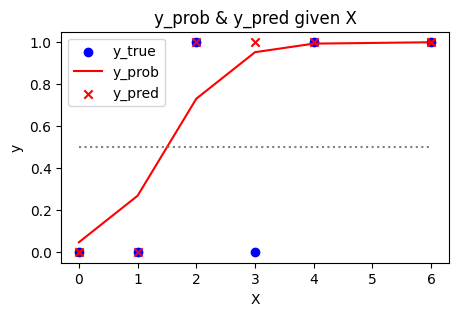

In [6]:
plt.figure(figsize=(5,3))
plt.scatter(X, y, color='b', label='y_true')
plt.plot(X, y_probs, color='r', label='y_prob')
plt.scatter(X, y_preds, color='r', marker='x', label='y_pred')
plt.plot([X.min(), X.max()], [0.5]*2, linestyle='dotted', color='grey')
plt.xlabel('X')
plt.ylabel('y')
plt.title('y_prob & y_pred given X')
plt.legend()

### Calculate Cost
Logistic Regression uses the Log Loss loss function within a cost function.


In [7]:
def calc_cost(X, y, w, b, elipson=1e-5):
    m = X.shape[0]

    cost = 0.

    for i in range(m):
        z = w * X[i] + b
        f_wb = sigmoid(z)
        cost += -y[i] * np.log(f_wb + elipson) - (1 - y[i]) * np.log(1 - f_wb + elipson)

    cost /= m
    return cost

In [8]:
calc_cost(X, y, w, b)

0.6217113453317057

In [9]:
calc_cost(X, y, w+5, b)

2.5962602136399515

### Gradient Descent
For a single gradient step, first calculate the gradient (AKA, the partial derivatives for the weight and bias).


In [10]:
def calc_gradient(X, y, w, b):
    m = X.shape[0]

    dj_dw = 0.
    dj_db = 0.

    for i in range(m):
        z = w * X[i] + b
        f_wb = sigmoid(z)
        err = f_wb - y[i]
        dj_dw += err * X[i]
        dj_db += err

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

Apply a single gradient step with an alpha (learning rate).

In [11]:
print(f"initial w: {w}, initial b: {b}, initial_cost: {calc_cost(X, y, w, b)}\n")

dj_dw, dj_db = calc_gradient(X, y, w, b)
print(f"dj_dw: {dj_dw}, dj_db: {dj_db}\n")

alpha = 0.01
w_new = w - alpha * dj_dw
b_new = b - alpha * dj_db
print(f"final w: {w_new}, final b: {b_new}, final cost: {calc_cost(X, y, w_new, b_new)}")

initial w: 2, initial b: -3, initial_cost: 0.6217113453317057

dj_dw: 0.426878197990708, dj_db: 0.16553062574995486

final w: 1.995731218020093, final b: -3.0016553062574998, final cost: 0.6196188530626964


Perform gradient descent. Apply the gradient step to the weight and bias over 1000 iterations.

In [12]:
def gradient_descent(X, y, w, b, alpha=0.01, n_iters=1000, history_step=100):
    history = {}

    for iter in range(n_iters):
        dj_dw, dj_db = calc_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if iter % history_step == 0:
            cost = calc_cost(X, y, w, b)
            history[iter] = cost
            print(f"Iter\t{iter}\tCost\t{cost}")

    return history, w, b

In [13]:
history, w_new, b_new = gradient_descent(X, y, w, b)

Iter	0	Cost	0.6196188530626964
Iter	100	Cost	0.4735965086316332
Iter	200	Cost	0.4222697608041695
Iter	300	Cost	0.41060197166900286
Iter	400	Cost	0.40861185893134055
Iter	500	Cost	0.4082839141537729
Iter	600	Cost	0.4081976203922892
Iter	700	Cost	0.4081454581212511
Iter	800	Cost	0.4080993822139762
Iter	900	Cost	0.4080556690051818


Plot the cost of our weight and bias over the training history.

In [14]:
def plot_history(history):
    plt.figure(figsize=(4,3))
    plt.plot(history.keys(), history.values())
    plt.title("Cost over iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")

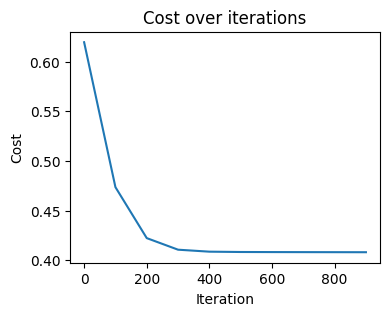

In [15]:
plot_history(history)

### Model Evaluation
Evaluate how well our model predicts y with the trained model.

Text(0, 0.5, 'y')

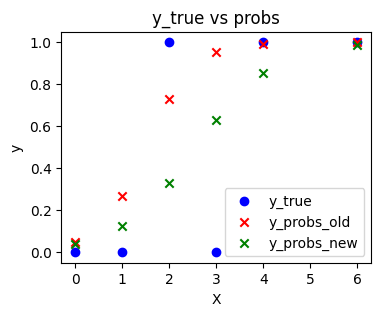

In [16]:
y_probs_old, y_preds_old = predict_y(X, w, b)
y_probs_new, y_preds_new = predict_y(X, w_new, b_new)

plt.figure(figsize=(4,3))
plt.scatter(X, y, marker='o', color='blue', label='y_true')
plt.scatter(X, y_probs_old, marker='x', color='red', label='y_probs_old')
plt.scatter(X, y_probs_new, marker='x', color='green', label='y_probs_new')
plt.legend()
plt.title("y_true vs probs")
plt.xlabel('X')
plt.ylabel('y')

## Multiple Logistic Regression
With Logistic Regression done and working, this section will cover Multiple Logistic Regression.


### Initialize X, y, w, b
Like before, initialize our dataset and model parameters.


In [17]:
X = np.array([
    [1, 4],
    [3, 1],
    [5, 2],
    [7, 3]
])

y = np.array([1, 0, 0, 1])

w = np.array([1, 2])
b = -3

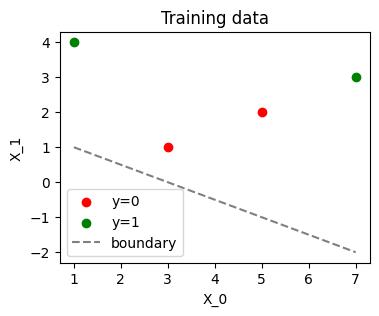

In [18]:
plt.figure(figsize=(4,3))
plt.scatter(X[:,0][y==0], X[:,1][y==0], color='r', label='y=0')
plt.scatter(X[:,0][y==1], X[:,1][y==1], color='g', label='y=1')
plt.title('Training data')
plt.xlabel('X_0')
plt.ylabel('X_1')

# decision boundary
X_0 = np.array([X[:,0].min(), X[:,0].max()])
X_1 = - ((w[0] * X_0 + b) / w[1])
plt.plot(X_0, X_1, linestyle='dashed', color='gray', label='boundary')

plt.legend()

### Predict y_hat
Create an updated prediction function using multiple features and the dot product.

In [19]:
def predict_y(X, w, b):
    m = X.shape[0]
    y_probs = np.zeros(m)

    for i in range(m):
        z = np.dot(w, X[i]) + b
        f_wb = sigmoid(z)
        y_probs[i] = f_wb

    y_preds = np.where(y_probs >= 0.5, 1, 0)
    return y_probs, y_preds

In [20]:
y_probs, y_preds = predict_y(X, w, b)
y_probs, y_preds

(array([0.99752738, 0.88079708, 0.99752738, 0.9999546 ]), array([1, 1, 1, 1]))

### Calculate Cost
Apply the new cost function that uses the updated predict_y function.


In [21]:
def calc_cost(X, y, w, b, elipson=1e-5):
    m = X.shape[0]

    cost = 0

    for i in range(m):
        z = np.dot(w, X[i]) + b
        f_wb = sigmoid(z)
        cost += -y[i] * np.log(f_wb + elipson) - (1 - y[i]) * np.log(1 - f_wb + elipson)

    cost /= m
    return cost

In [22]:
calc_cost(X, y, w, b)

2.031946184062107

### Gradient Descent
Gradient Descent
Calculate the gradient of the cost function given multiple features.

In [23]:
def calc_gradient(X, y, w, b):
    m = X.shape[0]
    n = X.shape[1]

    dj_dw = np.zeros(n)
    dj_db = 0.

    for i in range(m):
        z = np.dot(w, X[i]) + b
        f_wb = sigmoid(z)
        err = f_wb - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i, j]
        dj_db += err

    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [24]:
dj_dw, dj_db = calc_gradient(X, y, w, b)

alpha = 0.01
w_new = w - alpha * dj_dw
b_new = b - alpha * dj_db

cost_before = calc_cost(X, y, w, b)
cost_after = calc_cost(X, y, w_new, b_new)

print(f"Cost before: {cost_before}")
print(f"Cost after: {cost_after}")

Cost before: 2.031946184062107
Cost after: 1.988433416025605


In [25]:
def gradient_descent(X, y, w, b, alpha=0.01, n_iters=1000, history_step=100):
    history = {}

    for iter in range(n_iters):
        dj_dw, dj_db = calc_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if iter % history_step == 0:
            cost = calc_cost(X, y, w, b)
            history[iter] = cost
            print(f"Iter\t{iter}\tCost\t{cost}")

    return history, w, b

In [26]:
history, w_new, b_new = gradient_descent(X, y, w, b)

Iter	0	Cost	1.988433416025605
Iter	100	Cost	0.24904661975284273
Iter	200	Cost	0.2427026053919844
Iter	300	Cost	0.2388484414744647
Iter	400	Cost	0.23535988732569096
Iter	500	Cost	0.23215465573752544
Iter	600	Cost	0.22917594178385936
Iter	700	Cost	0.22638308305615462
Iter	800	Cost	0.22374607546669464
Iter	900	Cost	0.2212421916958098


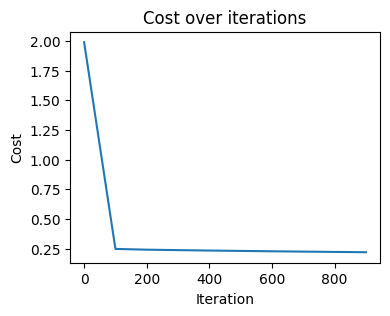

In [27]:
plot_history(history)

In [28]:
def plot_true_vs_preds(X, y, w, b):
    _, y_preds = predict_y(X, w, b)
    plt.figure(figsize=(6,4))

    plt.scatter(X[:,0][y==0], X[:,1][y==0], color='r', s=80, label='y=0')
    plt.scatter(X[:,0][y==1], X[:,1][y==1], color='g', s=80, label='y=1')

    plt.scatter(X[:,0][y_preds==0], X[:,1][y_preds==0], color='y', s=80, label='y_hat=0', marker='x')
    plt.scatter(X[:,0][y_preds==1], X[:,1][y_preds==1], color='purple', s=80, label='y_hat=1', marker='x')

    X_0 = np.array([X[:,0].min(), X[:,0].max()])
    X_1 = - ((w[0] * X_0 + b) / w[1])
    plt.plot(X_0, X_1, linestyle='dotted', color='gray', label='boundary')

    plt.legend()
    plt.title('y vs y_hat')
    plt.xlabel('X_0')
    plt.ylabel('X_1')

    plt.ylim(X[:,1].min() - 0.1, X[:,1].max() + 0.1)

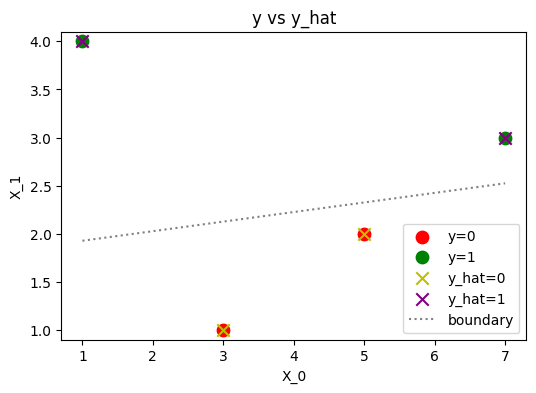

In [29]:
plot_true_vs_preds(X, y, w_new, b_new)

### Test with more data

In [30]:
X, y = make_blobs(n_samples=300, centers=2, random_state=42, cluster_std=3.0)
X /= X.max()
X.shape, y.shape

((300, 2), (300,))

In [31]:
np.random.seed(42)
w = np.random.rand(2)
b = np.random.rand()
w, b

(array([0.37454012, 0.95071431]), 0.7319939418114051)

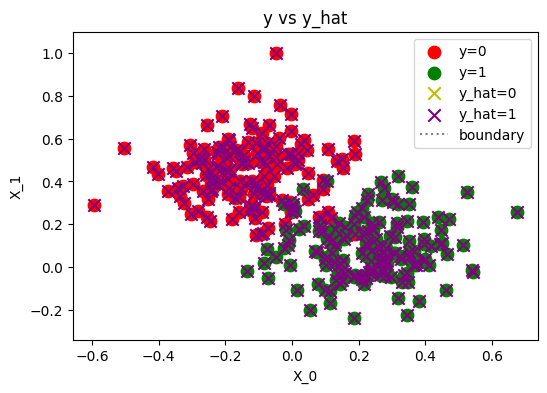

In [32]:
plot_true_vs_preds(X, y, w, b)

In [33]:
history, w_new, b_new = gradient_descent(X, y, w, b)

Iter	0	Cost	0.8661311006593049
Iter	100	Cost	0.795573968078193
Iter	200	Cost	0.7455616978003812
Iter	300	Cost	0.7094742654985666
Iter	400	Cost	0.6824077763291291
Iter	500	Cost	0.6610653239539258
Iter	600	Cost	0.6433548714301661
Iter	700	Cost	0.6279916346022277
Iter	800	Cost	0.6141993195817663
Iter	900	Cost	0.6015110708405672


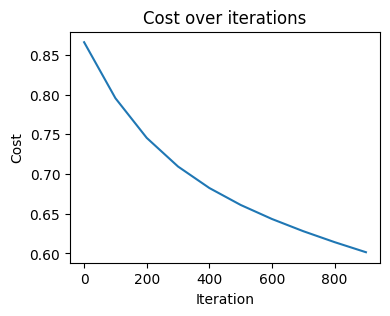

In [34]:
plot_history(history)

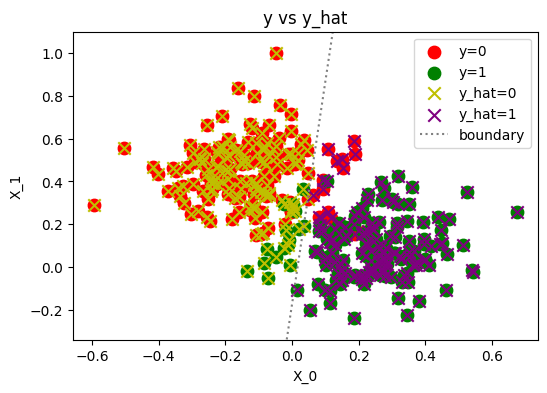

In [35]:
plot_true_vs_preds(X, y, w_new, b_new)